In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer, __qiskit_version__
from qiskit.visualization import plot_histogram

__Problem__: Given a black box with 4 possible functions (const-0, const-1, identity, negation)  
Decide if the function inside the black box is (const-0 or const-1) or (identity, negation)
  
With a classical computer we can figure out if `f(x)` is constant or variable function with a minimum of 2 operations, but with a quantum circuit we can do it with one operation.
  
We need to use 2 qubits for this circuit:  
*q0* has `|x>` as input, and `|x>` as output  
*q1* has `|0>` as input, and `f(x)` as output (result of mystery function)
  
If the black box takes `|x0>` to `|11>` then it is a constant function (const=0 or const-1)  
If it takes our input `|x0>` to `|10>` then it is a variable function (identity or negation)

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
c = QuantumCircuit(qr, cr)

c.x([0,1])
c.h([0,1])
c.barrier()

Now for the black box:  
This can be: Identity, Negation, Constant-0, or Constant-1; try all four one at a time!  

*q0* is the input and *q1* is the answer bit  
if constant=0 or constant-1 the output should be `|11>`  
if identity or negation, the output should be `|10>`

In the next cell, leave all 4 alone to try constant-0, then un-comment the others one at a time and run to see the results of all four black box functions.

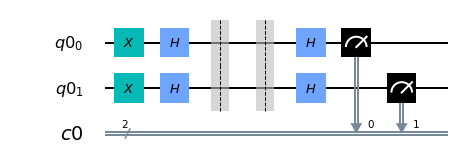

In [3]:
# constant 0 - do nothing, the hadamard will take both bits back to |1>, so |11>

# constant 1 - bit flip takes q1 from |-> to -|->, then H takes it to -1, so |11>
#c.x(1)

# identity - CNOT from q0 to q1, measure should find |01>
#c.cx(0,1)

# negation - CNOT from q0 to q1 then X applied to q1, measure should find |01>
#c.cx(0,1)
#c.x(1)

# finish the circuit and draw it - don't change these lines below
c.barrier()
c.h([0,1])
c.measure(0,0)
c.measure(1,1)
c.draw(output='mpl')

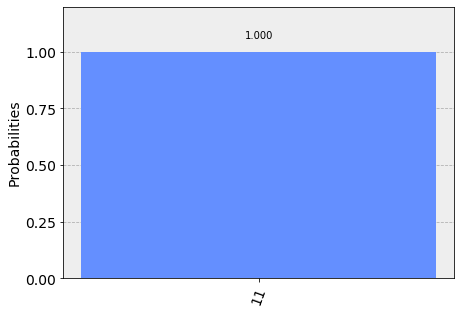

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(c, backend=simulator).result()
plot_histogram(result.get_counts(c))

In [5]:
__qiskit_version__

{'qiskit-terra': '0.10.0',
 'qiskit-aer': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.3.3',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.13.0'}